# 时间序列图
tsplot函数说是绘制时间序列图，还不如说是绘制简单的线图更加合适吧，因为我在绘制带timestap时间索引的pandas.Series时，并没有自动升采样绘图，只是数据有有什么数据就画什么，这在时间序列上应该是不对的。

因为我遇到这样一种情况，一个产品只在上半年卖，从数据库中取出数据只有每年上半年的数据，下半年没有数据也应该填充为0才对啊，但是seaborn的tsplot没有这个功能。

下面先介绍tsplot绘制线图吧，传入一个list或者series，直接绘制线图。

In [ ]:
## 1.tsplot时序图

/home/zt/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/zt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


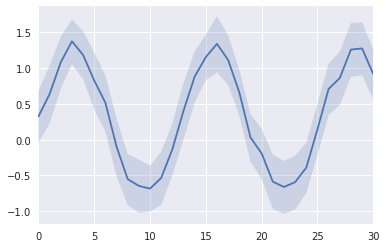

In [2]:
# 绘制带有半透明置信带的轨迹：
# data是多组list的组合，这时候应该绘制多条曲线才对啊，其实不是的，是多组list的均值的序列图（默认）
import numpy as np; 
np.random.seed(22)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

x = np.linspace(0, 15, 31)
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
ax = sns.tsplot(data=data)

/home/zt/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/zt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


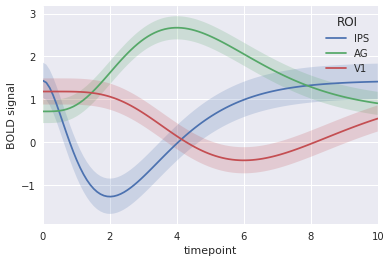

In [3]:
# condition分组
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal", unit="subject", condition="ROI", data=gammas)

/home/zt/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/zt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


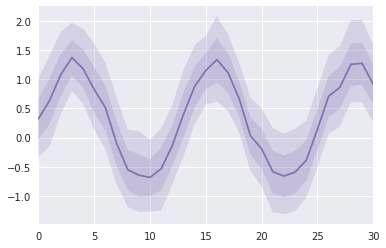

In [4]:
# 绘制不同的置信度拟合图
ax = sns.tsplot(data=data, ci=[68, 95], color="m")

/home/zt/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/home/zt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


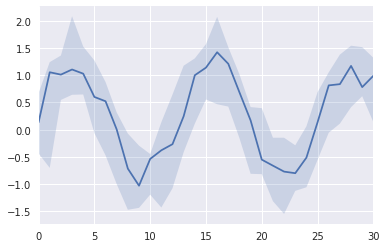

In [5]:
# 使用不同的统计函数，默认的是均值，这里是中位数
ax = sns.tsplot(data=data, estimator=np.median)

## panda线图
pandas的dataframe本身也有绘图函数，对于常见的分析图形还是很方便的，而且可以在plot函数中指定title等

## 采样的时序图
如果时序中每天的数据都有还好说，如果没有，就需要采样了。

In [ ]:
def plot_ts_day(x,y):
    """绘制每天的时间序列图。
    需要注意的是，序列是不是连续的，也就是说某天的数据是没有的,因此需要采样至每天都有记录，原来数据没有的就填充0
    x:时间轴，string或者time类型,是一个seires
    y:值
    """
    # x转成时间类型Timestamp，y也转成list
    x=[pd.to_datetime(str(i)) for i in x]
    y=[i for i in y]
    s=pd.Series(y,index=x)
    s = s.resample(rule='D',fill_method='ffill') # 生采样没有的会被填充
    # 原来没有的就填充为0
    s[s.index]=0
    s[x]=y
    # 重建索引，画出来的图好看点
    x2 = [i.strftime('%Y-%m-%d') for i in s.index]
    s.index = x2
    # 画图，这里使用series的plot函数，而不是seaborn.tsplot函数
    s.plot()


In [ ]:
def plot_ts_month(x,y):
    """绘制月的时间序列图，每月一个数据点，而不是每天一个"""
    # 将x转成时间类型timestamp,y也转成list
    try:
        x = [pd.to_datetime(str(i)) for i in x]
    except:
        x=[pd.to_datetime(str(i)+'01') for i in x]
    y=[i for i in y]
    #
    s=pd.Series(y,index=x)
    # 降采样至月
    s = s.resample('M', label='right').sum().fillna(0)
    # 重建索引，这样画出来的图好看点
    s.index=[i.strftime('%Y%m') for i in s.index]
    s.plot()

In [ ]:
分组的线图，比如seaborn中的hue参数，方法是，先将dataframe长表格式转成宽表格式（透视表），每列是不同的年。

In [ ]:
# 分组的线图
# 转成透视表后，绘图
data.pivot(index='month2',columns='year',values='salecount').plot(title='销量')

# 当数据很大的时候，你想绘制分组的统计图，比如将不同产品，相同的年月的销量进行加或者均值后在绘制线图
# 使用 aggfunc 参数即可，默认是mean
data.pivot_table(index='month2',columns='year',values='salecount',aggfunc='sum')
    .plot(title='销量',style='o-')